**Heat Equation Simulation via Monte Carlo and Explicit Euler**

This notebook approximates the solution of the 1D heat equation using a Monte Carlo simulation combined with Explicit Euler discretization. Each spatial-point is computed by averaging multiple stochastic realizations, which corresponds to simulating the underlying diffusion process.This approach demonstrates stochastic numerical methods for PDEs, which are highly relevant in modeling diffusive processes, risk factors, and derivative pricing under stochastic dynamics.

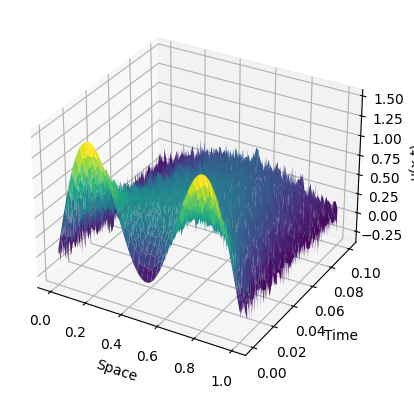

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# --------------------------
# Heat Equation Simulation - Explicit Euler / Monte Carlo
# --------------------------
# This notebook simulates the 1D heat equation using a Monte Carlo approach
# with the Explicit Euler method. The idea is to approximate the solution
# at each point in space and time by averaging over multiple stochastic
# realizations.

# Number of spatial steps
M = 80
# Number of time steps
ts = 400
# Number of Monte Carlo draws
draws = 100

# Create spatial and temporal grids
x = np.linspace(0,1,M+1,endpoint=True)
t = np.linspace(0,0.1,ts+1,endpoint=True)

# Generate standard normal random numbers for stochastic paths
z = np.random.normal(0,1,size=(M+1, ts+1, draws))

# Initialize array for solution
u = np.zeros((M+1, ts+1))

# Monte Carlo simulation loop
for n in range(0, ts+1):
    for m in range(0, M+1):
        v = 0
        for a in range(draws):
            v += (np.sin(np.pi*(np.sqrt(2*t[n])*z[m,n,a] + x[m])) +
                  np.sin(3*np.pi*(np.sqrt(2*t[n])*z[m,n,a] + x[m])))
        u[m,n] = v / draws

# Plot the solution
X, T = np.meshgrid(x, t)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T, u.T, cmap='viridis')
ax.set_xlabel('Space')
ax.set_ylabel('Time')
ax.set_zlabel('u(x,t)')
plt.show()
